In [1]:
import json
import pandas as pd
import time
import os
from tqdm.notebook import tqdm
DIR = "C:/Users/enduser/OneDrive - Politecnico di Milano/Ingegneria matematica/Tesi/ProveDiCodice/E3C-Corpus/data_collection/Italian/layer3"

# Elenco dei file nella directory
data_files = os.listdir(DIR)

In [ ]:
dfs = []
for filename in tqdm(os.listdir(DIR)):
    authors_string = False
    authors_dict = False
    f = os.path.join(DIR, filename)
    if os.path.isfile(f):
      with open(f, 'r', encoding='utf-8') as fp: # QUESTA è LA RIGA MODIFICATA, VEDI CODICE ORIGINALE VITTORIO PER CAPIRE, QUESTA MODIFICA è STATA NECESSARIA ALTRIMENTI MI DAVA ERRORE (SU COLLAB NO)
        d = json.load(fp)
      if d['authors'] == []:
        d['authors'] = ''
        i = [0]
      elif isinstance(d['authors'], str): #for some Spanish documents (es ES102568.json)
        authors_string = True
        i = [0]
      elif isinstance(d['authors'], dict): #for Basque
        authors_dict = True
        i = [0]
      else:
        i = list(range(len(d['authors'])))
      data = pd.DataFrame(d, index=i)
      if d['authors'] != '':
        try:
          data.authors = pd.DataFrame(data.authors.values.tolist())['author']
        except: #spanish has different format
          if authors_dict:
            data.authors = d['authors']['author']
          elif not authors_string:
            data.authors = pd.DataFrame(data.authors.values.tolist())[1]
        cols = list(data.columns) # columns are different in different languages
        cols.remove('authors')
        data = data.groupby(cols)['authors'].apply(','.join).reset_index()
      dfs.append(data) # append the data frame to the list
df = pd.concat(dfs, ignore_index=True, axis=0) # concatenate all the data frames in the list.

  0%|          | 0/10213 [00:00<?, ?it/s]

In [1]:
import pickle
from sklearn.cluster import KMeans
import numpy as np

In [3]:
with open('EmbeddingLayer3_InfoGraph.pkl', 'rb') as file: #importo gli embedding dei grafi di layer 3
    emb = pickle.load(file)

In [21]:
len(emb)

10213

In [6]:
len(emb[0]) # = 96 --> ogni embedding di un grafo ha 96 elementi,

96

la dimensione di ciascun vettore è 96 (3 gnn layers che producono vettori dim 32 che concatenandosi 3 volte arrivano a 96)

# Primi 100 embeddings layer 3

In [61]:
# Andiamo ad analizzare i primi 100 embedding per poterci lavorare più agilmente:

emb100 = emb[0:100]

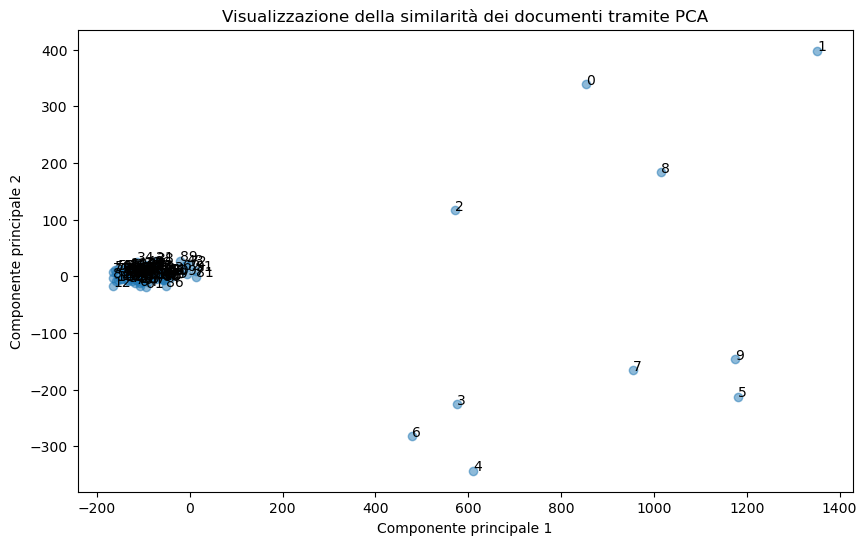

In [62]:
document_vectors = emb100
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

Notiamo che i documenti dallo 0 al 9 sono molto diversi dagli altri!

Da una rapida analisi vediamo subito che il fattore comune dei primi 10 testi è che sono molto più lunghi degli altri 90, un'osservazione sensata potrebbe essere quella di rimuovere i testi troppo brevi perchè forniscono poche informazioni essendo poco particolareggiati.

In [37]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Percentuale di varianza spiegata da ciascuna componente principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")

Percentuale di varianza spiegata da ciascuna componente principale:
PC1: 86.82%
PC2: 6.42%


In [34]:
weights = pca.components_

print("Pesi della prima componente principale:")
#print(weights)

Pesi della prima componente principale:


In [50]:
# Similarità dei documenti:

document_similarity = np.dot(document_vectors, document_vectors.T)
document_lengths = np.linalg.norm(document_vectors, axis=1)  # Lunghezza di ciascun vettore

# Normalizzazione dei valori di similarità
document_similarity_normalized = document_similarity / np.outer(document_lengths, document_lengths)

'''
#il codice sopra per calcolare la similarità trai documenti, è analogo a:

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(document_vectors)

'''

'\n#il codice sopra per calcolare la similarità trai documenti, è analogo a:\n\nfrom sklearn.metrics.pairwise import cosine_similarity\nsimilarity_matrix = cosine_similarity(document_vectors)\n\n'

In [63]:
#document_similarity_normalized[0] # document_similarity è una matrice quadrata 100*100 dove in posizione i,j si rappresenta 
#la similarità tra il documento i e j

In [ ]:
ORA FACCIO CLUSTERING!

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(document_vectors)
similarity_matrix[0]

In [71]:
from sklearn.cluster import KMeans
import numpy as np

# Supponiamo che tu abbia una matrice numpy chiamata "data_matrix"

# Definisci il modello K-means
n_clusters = 3  # Numero di cluster desiderato
kmeans = KMeans(n_clusters=n_clusters)

# Adatta il modello ai dati
kmeans.fit(emb)

# Etichette dei cluster
cluster_labels = kmeans.labels_

# Centroidi dei cluster
centroids = kmeans.cluster_centers_

# Visualizza i risultati
print("Etichette dei cluster:", cluster_labels)
#print("Centroidi dei cluster:", centroids)

Etichette dei cluster: [1 1 1 ... 1 1 1]


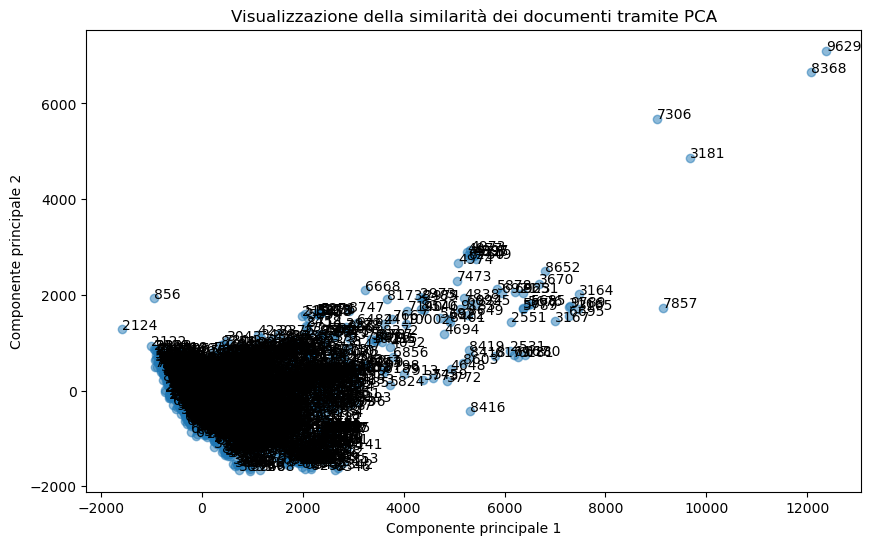

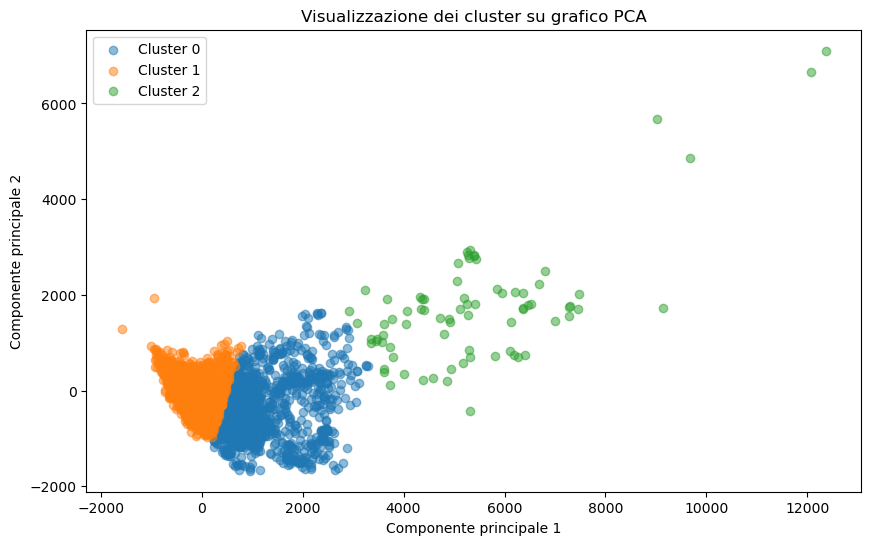

In [73]:
document_vectors = emb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

plt.figure(figsize=(10, 6))
for label in set(cluster_labels):
    plt.scatter(document_embedding[cluster_labels == label, 0], document_embedding[cluster_labels == label, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('Visualizzazione dei cluster su grafico PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.show()

# Tutti i documenti!

In [ ]:
emb100 = emb[:10000]

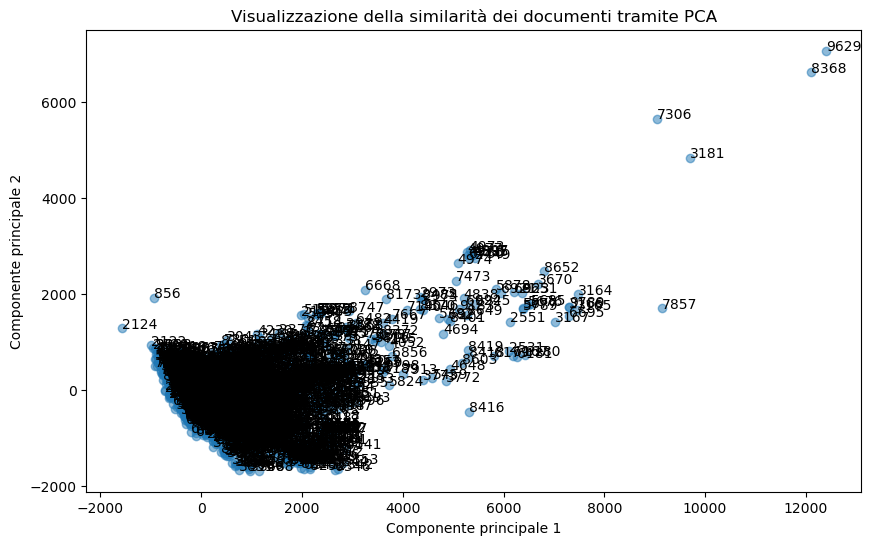

In [23]:
document_vectors = emb100
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Applica PCA per ridurre le dimensioni
pca = PCA(n_components=2)  # Vogliamo ridurre a due dimensioni per la visualizzazione
document_embedding = pca.fit_transform(document_vectors)

# 3. Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding[:, 0], document_embedding[:, 1], alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')

# Aggiungi etichette per i punti (opzionale)
for i, txt in enumerate(range(len(document_vectors))):
    plt.annotate(txt, (document_embedding[i, 0], document_embedding[i, 1]))

plt.show()

Carico il dataset di layer 3 (con il testo e cerco di capire se ha senso) (cosi ho il modo di vedere quale testo sia associato con quale indice del dataset), 
e cerco di capire se questi risultati sono sensati (ad esempio 9629 e 8368), sono distanti da tutti i testi e vicini fra loro,
vediamo se le anamnesi sono effetivamente simili.

Risposta SI'! Vedi sotto: infatti tutti i documenti che si trovano in alto a destra nel PCA sono corrispondenti a 
spiegazioni farmcologiche provenienti da Agenzia Italiana del Farmaco!!

In [ ]:
df.loc[9629]

In [29]:
df.loc[8368]

doi                                                                  
publication_date                                           2021-02-01
id                                                           IT110442
url                                                                  
source                                   Agenzia Italiana del Farmaco
source_url                      https://farmaci.agenziafarmaco.gov.it
licence                                                      CC-BY-NC
language                                                           it
type                                                            other
description                patient information leaflets for medicines
text                Confezioni \r\n Remifentanil Mylan Generics 1 ...
authors                                                              
Name: 8368, dtype: object

In [24]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Percentuale di varianza spiegata da ciascuna componente principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio*100:.2f}%")

Percentuale di varianza spiegata da ciascuna componente principale:
PC1: 60.15%
PC2: 17.62%


In [75]:
weights = pca.components_

print("Pesi della prima componente principale:")
#print(weights)

Pesi della prima componente principale:


Osservo una cosa interessante: la prima componente principale spiega quasi tutta la variabilità!!!

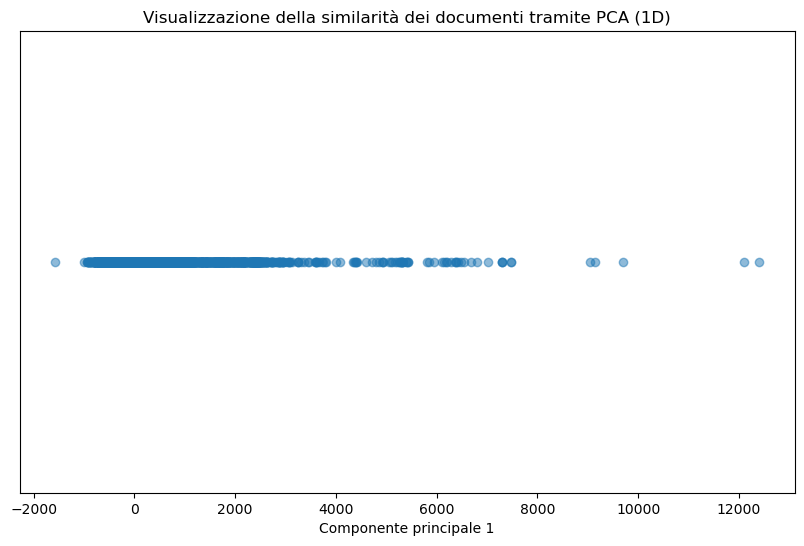

In [26]:
pca = PCA(n_components=1)
document_embedding = pca.fit_transform(document_vectors)

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(document_embedding, np.zeros_like(document_embedding), alpha=0.5)
plt.title('Visualizzazione della similarità dei documenti tramite PCA (1D)')
plt.xlabel('Componente principale 1')
plt.yticks([])  # Rimuovi le etichette sull'asse y
plt.show()